In [9]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [10]:
params = pd.read_csv("../data/interim/interim_data.csv")
params.head()

,ID,StudySample,LaserPowerHatch,LaserSpeedHatch,HatchSpacing,LaserPowerContour,Porosity,LayerHeight,EnergyDensityCalculated,Machine,Powder,MicroCTScan,HatchOffsetFromCountour
0,1,Plessis_1-1,280.0,1200.0,0.14,150.0,0.013,0.03,55.555556,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015
1,2,Plessis_1-2,252.0,1200.0,0.14,135.0,0.008,0.03,50.000000,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015
2,3,Plessis_1-3,224.0,1200.0,0.14,120.0,0.007,0.03,44.444444,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015
3,4,Plessis_1-4,197.0,1200.0,0.14,105.0,0.045,0.03,39.087302,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015
4,5,Plessis_1-5,308.0,1200.0,0.14,165.0,0.017,0.03,61.111111,EOS M290,EOS-supplied Ti6Al4V ELI,NaN,0.015


In [11]:
machine_title = params.Machine[0]
alloy_title = params.Powder[0]

In [13]:
try:
    params = params.drop(["ID","StudySample","HatchOffsetFromCountour", "MicroCTScan", "LayerHeight", "Machine", "Powder"], axis=1)
    print("dropped columns")
except:
    print("already dropped columns")
params = params[["LaserPowerHatch","LaserSpeedHatch","HatchSpacing","LaserPowerContour","EnergyDensityCalculated","Porosity"]]
params.head()

already dropped columns


,LaserPowerHatch,LaserSpeedHatch,HatchSpacing,LaserPowerContour,EnergyDensityCalculated,Porosity
0,280.0,1200.0,0.14,150.0,55.555556,0.013
1,252.0,1200.0,0.14,135.0,50.000000,0.008
2,224.0,1200.0,0.14,120.0,44.444444,0.007
3,197.0,1200.0,0.14,105.0,39.087302,0.045
4,308.0,1200.0,0.14,165.0,61.111111,0.017


In [14]:
split_pct = .25
seed = 100

train_data = params.sample(frac=1-split_pct, random_state=seed).reset_index()
test_data = params.drop(train_data.index).sample(frac=1, random_state=seed).reset_index()
train_data.head()

,index,LaserPowerHatch,LaserSpeedHatch,HatchSpacing,LaserPowerContour,EnergyDensityCalculated,Porosity
0,6,364.0,1200.0,0.14,195.0,72.222222,0.037
1,19,280.0,800.0,0.14,150.0,83.333333,0.179
2,11,280.0,1200.0,0.17,150.0,45.751634,0.026
3,20,320.0,800.0,0.14,171.0,95.238095,0.199
4,17,200.0,800.0,0.14,107.0,59.523810,0.036


In [51]:
train_vals = train_data.values
test_vals = test_data.values
X = train_vals[:,-2].reshape(-1,1)
y = train_vals[:,-1].reshape(-1, 1)

Xtest = test_vals[:,-2].reshape(-1, 1)
ytest = test_vals[:,-1].reshape(-1, 1)

model2 = LinearRegression()
model2.fit(X, y.T[0])

print(model2.score(Xtest, ytest))

-421.4221349530669


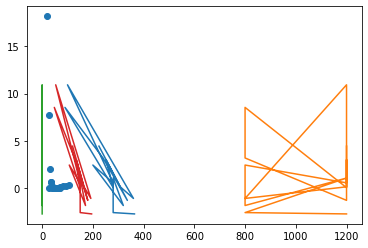

In [31]:
import matplotlib.pyplot as plt

plt.scatter(params.EnergyDensityCalculated, params.Porosity)
plt.plot(X, model2.predict(X))

In [52]:
ytest

array([[0.109],
       [0.179],
       [0.327],
       [0.199],
       [0.011],
       [0.036]])

In [59]:
from sklearn.neural_network import MLPRegressor
from sklearn import svm

svr_model1 = svm.SVR(kernel='poly', degree=2)
svr_model1.fit(X, y.T[0])

mlp_regressor = MLPRegressor(hidden_layer_sizes=(3,3), solver='lbfgs')
mlp_regressor.fit(X, y.T[0])

mlp_regressor.score(Xtest,ytest.T[0])

-193.61101556072234

In [61]:
train_vals[:,1:-2]

array([[3.640e+02, 1.200e+03, 1.400e-01, 1.950e+02],
       [2.800e+02, 8.000e+02, 1.400e-01, 1.500e+02],
       [2.800e+02, 1.200e+03, 1.700e-01, 1.500e+02],
       [3.200e+02, 8.000e+02, 1.400e-01, 1.710e+02],
       [2.000e+02, 8.000e+02, 1.400e-01, 1.070e+02],
       [2.800e+02, 1.200e+03, 2.000e-01, 1.500e+02],
       [1.000e+02, 1.200e+03, 1.400e-01, 5.355e+01],
       [3.600e+02, 8.000e+02, 1.400e-01, 1.920e+02],
       [3.080e+02, 1.200e+03, 1.400e-01, 1.650e+02],
       [2.800e+02, 1.200e+03, 1.400e-01, 1.500e+02],
       [2.800e+02, 1.200e+03, 1.400e-01, 1.500e+02],
       [2.520e+02, 1.200e+03, 1.400e-01, 1.350e+02],
       [2.800e+02, 1.200e+03, 2.300e-01, 1.500e+02],
       [9.000e+01, 8.000e+02, 1.400e-01, 4.800e+01],
       [2.400e+02, 8.000e+02, 1.400e-01, 1.280e+02],
       [3.360e+02, 1.200e+03, 1.400e-01, 1.800e+02],
       [2.240e+02, 1.200e+03, 1.400e-01, 1.200e+02]])